In [1]:
# Importing the needed libraries for the dataset.
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
sales = pd.read_csv("C:/Users/tkjay/Desktop/ssuper.csv")

In [42]:
sales.shape

(9994, 13)

In [43]:
sales.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [44]:
sales.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [45]:
# Getting all the needed information for the dataset.
sales.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [46]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [47]:
#Checking for duplicates.
sales.duplicated().sum()

17

In [48]:
sales = sales.drop_duplicates()

In [49]:
sales.shape

(9977, 13)

In [31]:
sales.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [35]:
sales.Country.unique()

array(['United States'], dtype=object)

In [50]:
#Dropping the unnecessary columns from the dataset.
sales = sales.drop(['Postal Code'], axis = 1)

In [51]:
sales = sales.drop(['Country'], axis = 1)

In [52]:
sales.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [54]:
sales_corr = sales.corr()
sales_corr

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200722,-0.028311,0.479067
Quantity,0.200722,1.000000,0.008678,0.066211
Discount,-0.028311,0.008678,1.000000,-0.219662
Profit,0.479067,0.066211,-0.219662,1.000000


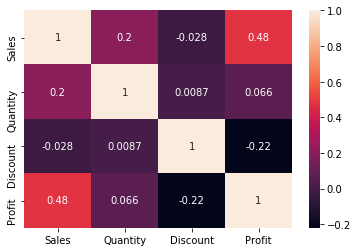

In [56]:
# Creating a heatmap of the correlated variables.
sns.heatmap(sales_corr, annot = True)

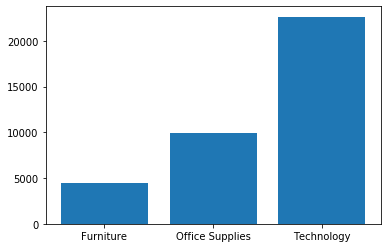

In [58]:
plt.bar('Category','Sales',data = sales)
plt.show()

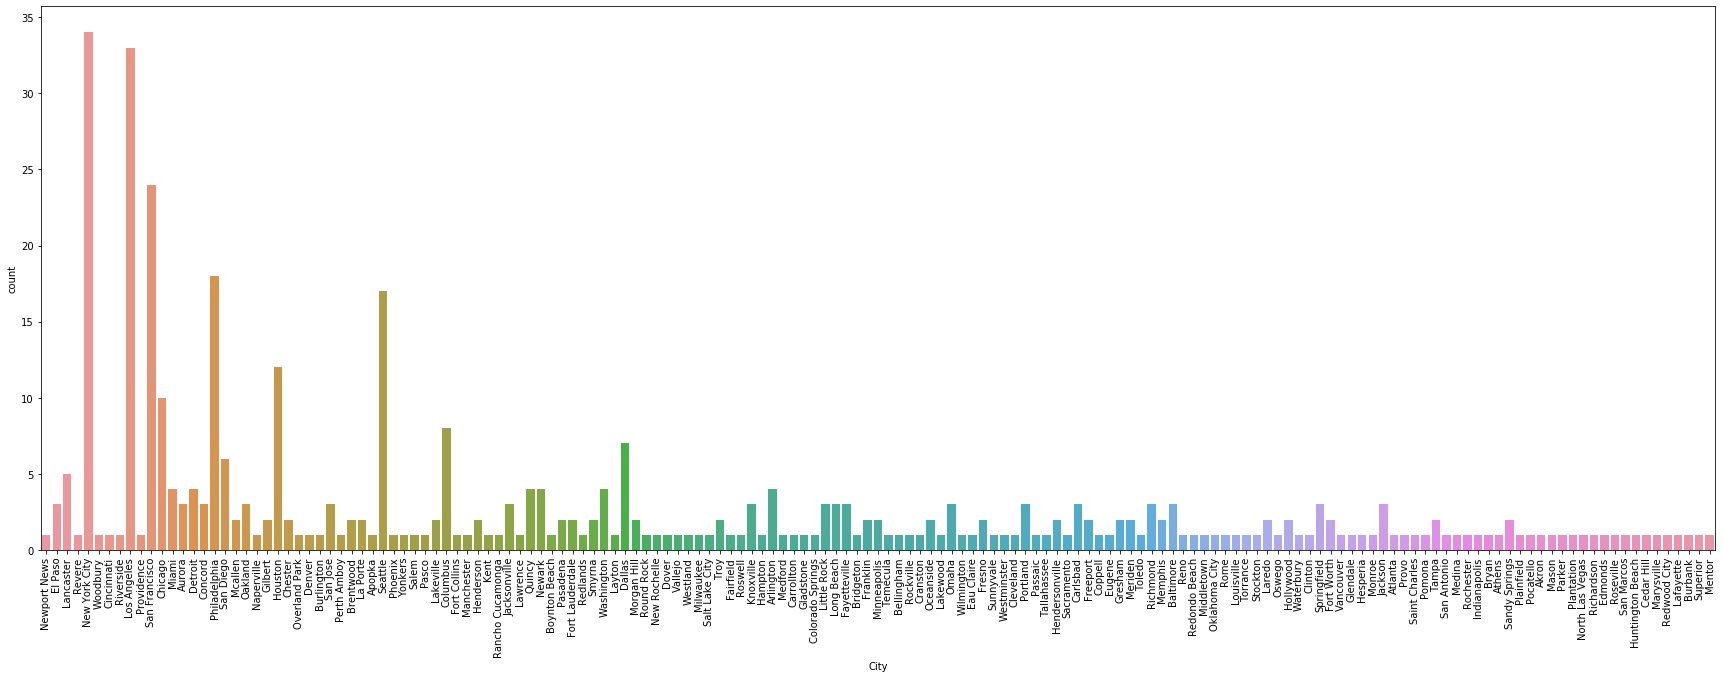

In [66]:
# Plotting the histogram of the states vs the count.
plt.figure(figsize = (30,10))
sns.countplot(x = 'City',data = sales.sample(n=400))
plt.xticks(rotation = 90)
plt.show()

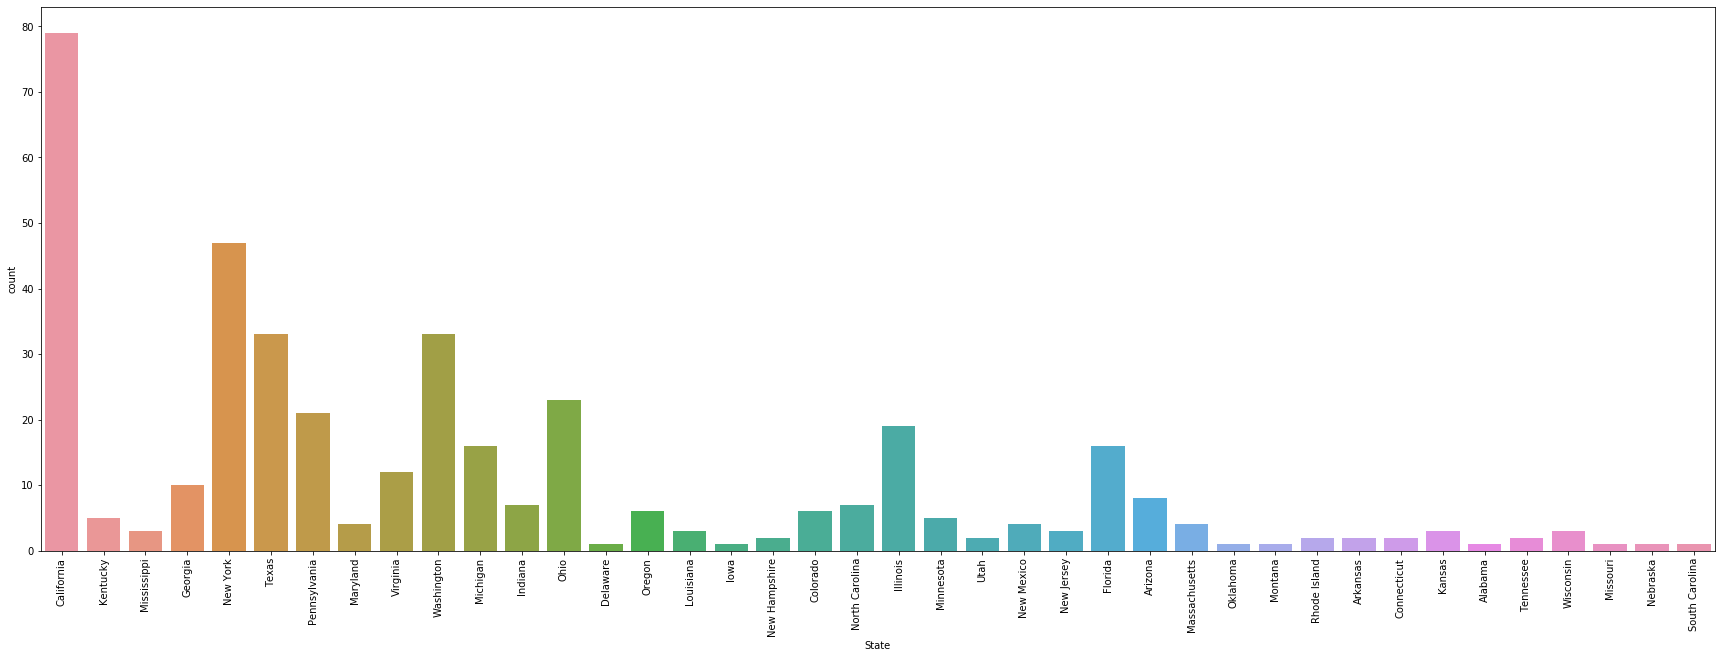

In [67]:
plt.figure(figsize = (30,10))
sns.countplot(x = 'State',data = sales.sample(n=400))
plt.xticks(rotation = 90)
plt.show()

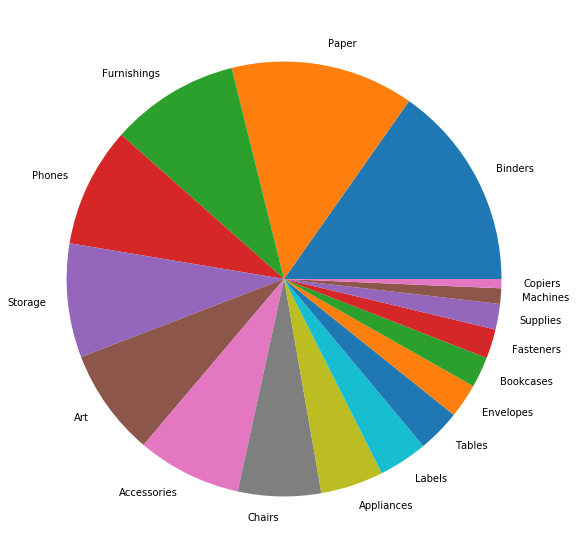

In [70]:
# plotting a pie chart for the types of office materials sold.
plt.figure(figsize = (14,10))
plt.pie(sales['Sub-Category'].value_counts(),labels= sales['Sub-Category'].value_counts().index)
plt.show()

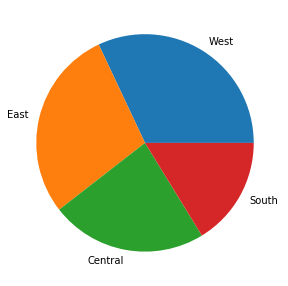

In [75]:
#plotting a pie figure for the most occurance based on the region.
plt.figure(figsize = (7,5))
plt.pie(sales['Region'].value_counts(),labels= sales['Region'].value_counts().index)
plt.show()